In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 16
import numpy as np
import pandas as pd
import seaborn as sns

import covid19

PALETTE = sns.color_palette()

## data

In [3]:
istat_path = 'comune_giorno.csv'
istat = covid19.data.istat_to_xarray(istat_path)

istat

<xarray.Dataset>
Dimensions:    (age_class: 6, location: 103, time: 95)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-04-04
  * age_class  (age_class) object '0-49' '50-59' '60-69' '70-79' '80-89' '90+'
  * location   (location) object 'Agrigento' 'Alessandria' ... 'Viterbo'
    region     (location) object 'Sicilia' 'Piemonte' ... 'Veneto' 'Lazio'
Data variables:
    deaths     (time, age_class, location) float64 0.0 1.0 0.0 ... 0.0 6.0 0.0

In [4]:
deaths_italy = istat.sum('location')['deaths']

deaths_italy

<xarray.DataArray 'deaths' (time: 95, age_class: 6)>
array([[ 11.,  16.,  48., 125., 223., 150.],
       [ 10.,  21.,  54., 124., 234., 185.],
       [ 18.,  22.,  61., 120., 264., 173.],
       [ 14.,  25.,  36., 125., 242., 167.],
       [ 13.,  24.,  42., 113., 233., 184.],
       [ 14.,  20.,  56., 123., 264., 196.],
       [ 20.,  26.,  57., 106., 220., 187.],
       [ 25.,  22.,  45., 122., 234., 165.],
       [ 10.,  25.,  50.,  99., 244., 194.],
       [ 14.,  28.,  52., 119., 245., 174.],
       [ 12.,  29.,  46., 135., 207., 158.],
       [ 18.,  22.,  41., 111., 220., 192.],
       [ 11.,  32.,  47.,  98., 236., 203.],
       [ 17.,  23.,  56., 110., 248., 187.],
       [ 14.,  21.,  47., 129., 267., 165.],
       [ 16.,  31.,  61., 118., 274., 167.],
       [ 17.,  29.,  50., 111., 277., 161.],
       [ 18.,  22.,  59., 101., 234., 182.],
       [ 11.,  19.,  55., 110., 225., 169.],
       [ 21.,  21.,  48., 111., 231., 188.],
       [  8.,  26.,  35., 109., 230., 187.],
       [ 18.,  22.,  63., 122., 227., 175.],
       [ 12.,  28.,  56., 119., 250., 161.],
       [ 18.,  20.,  48., 123., 245., 191.],
       [ 19.,  24.,  56., 125., 225., 174.],
       [ 15.,  20.,  41.,  88., 249., 167.],
       [ 21.,  30.,  36., 100., 255., 183.],
       [ 15.,  32.,  44., 126., 237., 184.],
       [ 12.,  21.,  58., 132., 239., 170.],
       [ 16.,  28.,  54., 100., 226., 177.],
       [ 15.,  25.,  48., 103., 251., 186.],
       [ 18.,  26.,  37., 118., 253., 189.],
       [ 12.,  25.,  46., 108., 227., 167.],
       [ 12.,  20.,  56., 104., 244., 199.],
       [  7.,  23.,  55., 114., 237., 183.],
       [ 19.,  21.,  40., 120., 236., 175.],
       [ 14.,  30.,  46., 118., 253., 186.],
       [ 18.,  25.,  38., 112., 246., 168.],
       [ 11.,  20.,  55., 107., 262., 183.],
       [ 15.,  27.,  38.,  95., 248., 167.],
       [  8.,  29.,  51., 113., 236., 188.],
       [ 10.,  22.,  48., 114., 243., 165.],
       [ 17.,  25.,  44., 116., 275., 183.],
       [ 17.,  21.,  50., 114., 230., 174.],
       [ 16.,  26.,  51., 129., 259., 179.],
       [ 12.,  24.,  42., 120., 204., 157.],
       [ 16.,  18.,  39., 105., 211., 164.],
       [  8.,  22.,  42., 114., 250., 190.],
       [  9.,  15.,  57., 118., 243., 166.],
       [ 20.,  17.,  52., 118., 249., 176.],
       [ 11.,  27.,  48., 123., 224., 141.],
       [ 12.,  21.,  58., 120., 239., 189.],
       [ 17.,  21.,  51., 106., 249., 165.],
       [ 14.,  23.,  36., 107., 246., 169.],
       [ 18.,  23.,  56., 127., 244., 199.],
       [ 13.,  19.,  53., 114., 259., 182.],
       [ 16.,  27.,  48., 105., 246., 197.],
       [ 12.,  33.,  30., 111., 246., 180.],
       [ 16.,  29.,  50., 138., 244., 167.],
       [ 13.,  22.,  35., 126., 250., 165.],
       [ 11.,  23.,  53., 136., 259., 185.],
       [ 11.,  30.,  43., 155., 284., 181.],
       [ 20.,  28.,  57., 168., 300., 204.],
       [ 20.,  27.,  54., 134., 293., 191.],
       [ 13.,  21.,  70., 144., 324., 194.],
       [ 23.,  26.,  61., 159., 370., 211.],
       [ 15.,  22.,  70., 185., 363., 213.],
       [ 15.,  41.,  70., 173., 341., 212.],
       [ 17.,  30.,  76., 201., 423., 241.],
       [ 18.,  34.,  79., 240., 458., 265.],
       [ 16.,  33.,  72., 234., 448., 260.],
       [ 15.,  35.,  71., 233., 453., 270.],
       [ 23.,  46.,  83., 259., 533., 286.],
       [ 25.,  28.,  84., 291., 508., 317.],
       [ 18.,  36.,  94., 269., 516., 313.],
       [ 22.,  34.,  93., 302., 500., 317.],
       [ 16.,  34., 113., 332., 570., 316.],
       [ 16.,  44.,  95., 307., 621., 373.],
       [ 21.,  35., 144., 338., 595., 393.],
       [ 26.,  39., 117., 319., 674., 374.],
       [ 21.,  58., 121., 380., 661., 372.],
       [  9.,  47., 109., 330., 623., 379.],
       [ 24.,  44., 124., 380., 636., 375.],
       [ 23.,  49., 131., 349., 586., 379.],
       [ 16.,  64., 114., 346., 617., 361.],
       [ 17.,  47., 119., 307., 589., 391.],
       [ 22.,  42., 108., 327., 625., 363.],
       [ 13.,  42., 113., 303., 

In [5]:
deaths_italy_fraction = deaths_italy / deaths_italy.sel(time=slice(None, '2020-02-25')).mean('time')

deaths_italy_fraction

<xarray.DataArray 'deaths' (time: 95, age_class: 6)>
array([[0.75397797, 0.67673716, 0.98138007, 1.09187334, 0.92346373,
        0.84797093],
       [0.68543452, 0.88821752, 1.10405257, 1.08313836, 0.96901575,
        1.04583081],
       [1.23378213, 0.9305136 , 1.2471705 , 1.04819841, 1.09324854,
        0.97799314],
       [0.95960832, 1.05740181, 0.73603505, 1.09187334, 1.00214449,
        0.9440743 ],
       [0.89106487, 1.01510574, 0.85870756, 0.9870535 , 0.96487466,
        1.04017767],
       [0.95960832, 0.84592145, 1.14494341, 1.07440337, 1.09324854,
        1.10801534],
       [1.37086903, 1.09969789, 1.16538883, 0.92590859, 0.91104045,
        1.05713709],
       [1.71358629, 0.9305136 , 0.92004381, 1.06566838, 0.96901575,
        0.93276802],
       [0.68543452, 1.05740181, 1.0222709 , 0.86476369, 1.01042668,
        1.09670907],
       [0.95960832, 1.18429003, 1.06316174, 1.03946342, 1.01456777,
        0.98364627],
       [0.82252142, 1.2265861 , 0.94048923, 1.17922321, 0.85720624,
        0.89319604],
       [1.23378213, 0.9305136 , 0.83826214, 0.96958353, 0.91104045,
        1.08540279],
       [0.75397797, 1.35347432, 0.96093465, 0.8560287 , 0.97729794,
        1.14758732],
       [1.16523868, 0.97280967, 1.14494341, 0.96084854, 1.02699105,
        1.05713709],
       [0.95960832, 0.88821752, 0.96093465, 1.12681329, 1.10567182,
        0.93276802],
       [1.09669523, 1.31117825, 1.2471705 , 1.03072844, 1.13465947,
        0.9440743 ],
       [1.16523868, 1.2265861 , 1.0222709 , 0.96958353, 1.14708275,
        0.91015546],
       [1.23378213, 0.9305136 , 1.20627966, 0.88223366, 0.96901575,
        1.02887139],
       [0.75397797, 0.80362538, 1.12449799, 0.96084854, 0.93174591,
        0.95538058],
       [1.43941248, 0.88821752, 0.98138007, 0.96958353, 0.95659247,
        1.06279023],
       [0.54834761, 1.09969789, 0.71558963, 0.95211355, 0.95245138,
        1.05713709],
       [1.23378213, 0.9305136 , 1.28806134, 1.06566838, 0.9400281 ,
        0.98929941],
       [0.82252142, 1.18429003, 1.14494341, 1.03946342, 1.03527324,
        0.91015546],
       [1.23378213, 0.84592145, 0.98138007, 1.07440337, 1.01456777,
        1.07974965],
       [1.30232558, 1.01510574, 1.14494341, 1.09187334, 0.93174591,
        0.98364627],
       [1.02815177, 0.84592145, 0.83826214, 0.76867883, 1.03113215,
        0.9440743 ],
       [1.43941248, 1.26888218, 0.73603505, 0.87349867, 1.0559787 ,
        1.03452453],
       [1.02815177, 1.35347432, 0.89959839, 1.10060833, 0.98143903,
        1.04017767],
       [0.82252142, 0.88821752, 1.18583425, 1.15301825, 0.98972122,
        0.96103372],
       [1.09669523, 1.18429003, 1.10405257, 0.87349867, 0.93588701,
        1.00060569],
       [1.02815177, 1.05740181, 0.98138007, 0.89970363, 1.03941433,
        1.05148395],
       [1.23378213, 1.09969789, 0.75648047, 1.03072844, 1.04769652,
        1.06844337],
       [0.82252142, 1.05740181, 0.94048923, 0.94337857, 0.9400281 ,
        0.9440743 ],
       [0.82252142, 0.84592145, 1.14494341, 0.90843862, 1.01042668,
        1.12497476],
       [0.47980416, 0.97280967, 1.12449799, 0.99578849, 0.98143903,
        1.03452453],
       [1.30232558, 0.88821752, 0.81781672, 1.04819841, 0.97729794,
        0.98929941],
       [0.95960832, 1.26888218, 0.94048923, 1.03072844, 1.04769652,
        1.05148395],
       [1.23378213, 1.05740181, 0.77692589, 0.97831852, 1.01870887,
        0.94972744],
       [0.75397797, 0.84592145, 1.12449799, 0.93464358, 1.08496635,
        1.03452453],
       [1.02815177, 1.14199396, 0.77692589, 0.82982374, 1.02699105,
        0.9440743 ],
       [0.54834761, 1.2265861 , 1.04271632, 0.9870535 , 0.97729794,
        1.06279023],
       [0.68543452, 0.9305136 , 0.98138007, 0.99578849, 1.00628559,
        0.93276802],
       [1.16523868, 1.05740181, 0.89959839, 1.01325846, 1.13880056,
        1.03452453],
       [1.16523868, 0.88821752, 1.0222709 , 0.99578849, 0.95245138,
        0.98364627],
       [1.09669523, 1.09969789,

## situation report

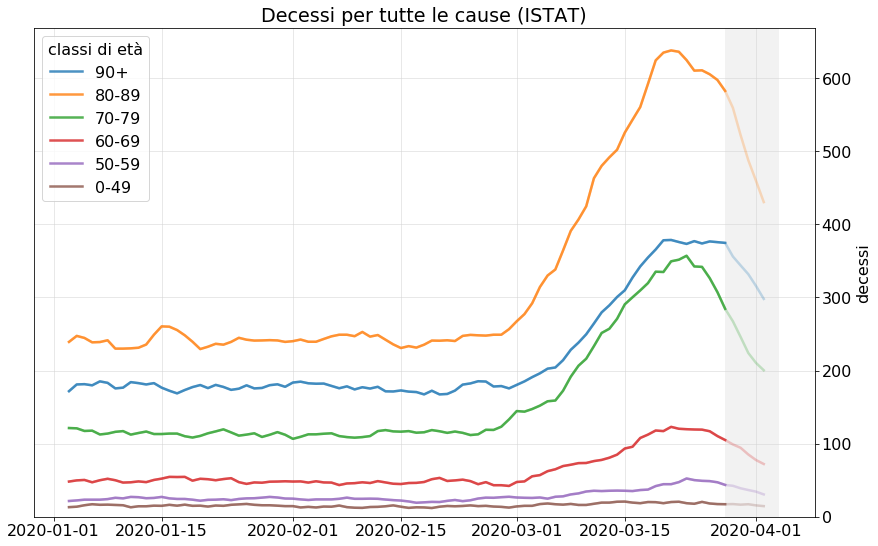

In [6]:
ax = covid19.plot.plot_xarray(deaths_italy, window=5, foreground_interval=(None, '2020-03-28'))
_ = ax.set(
    title='Decessi per tutte le cause (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età')

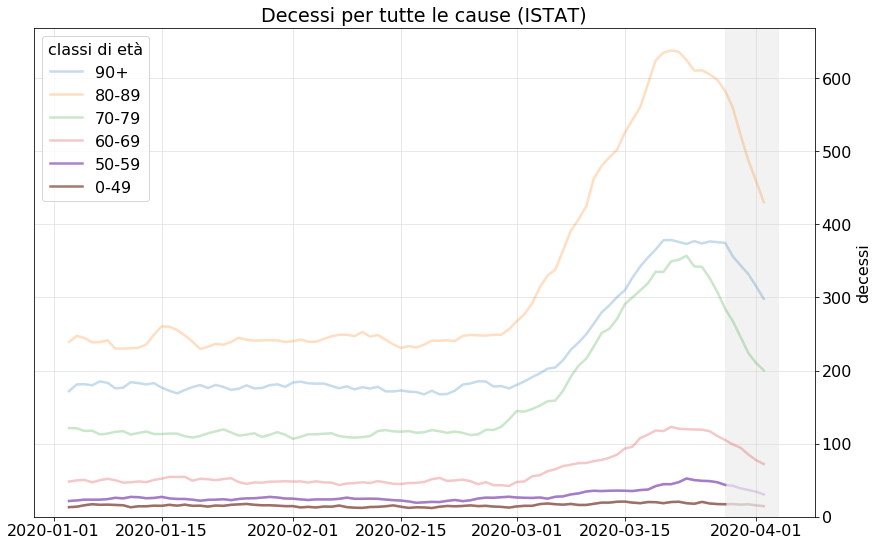

In [7]:
ax = covid19.plot.plot_xarray(deaths_italy, foreground_hue=['0-49', '50-59'], window=5, foreground_interval=(None, '2020-03-28'))
_ = ax.set(
    title='Decessi per tutte le cause (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età')

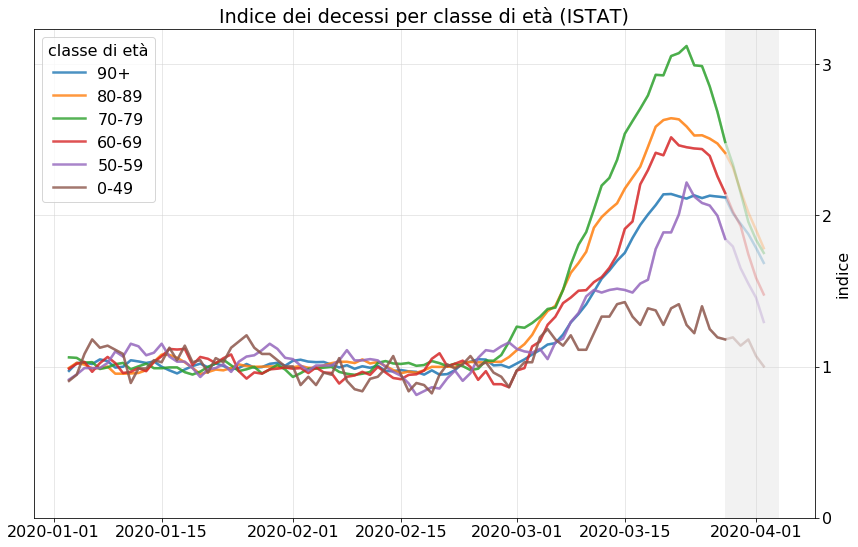

In [8]:
ax = covid19.plot.plot_xarray(deaths_italy_fraction, window=5, foreground_interval=(None, '2020-03-28'))
_ = ax.set(
    title='Indice dei decessi per classe di età (ISTAT)',
    ylabel='indice',
)
_ = ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
_ = ax.legend(title='classe di età')

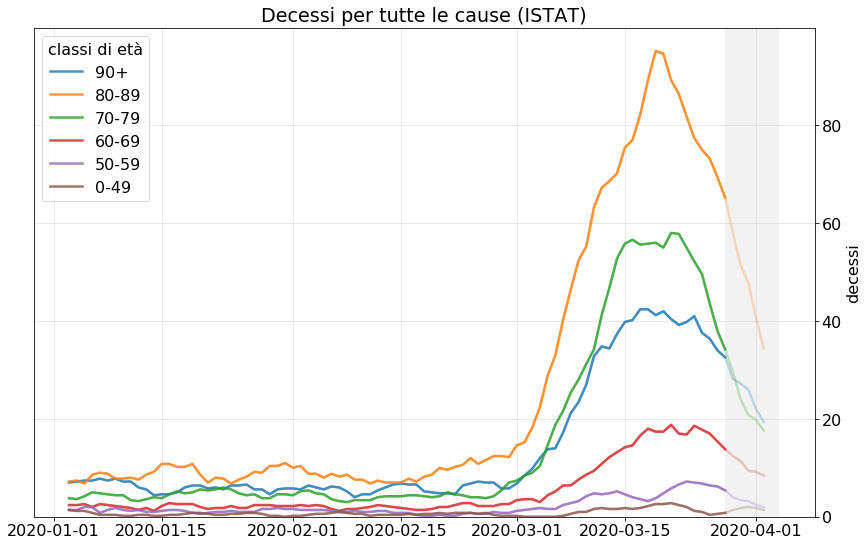

In [9]:
provincia = 'Bergamo'
istat_provincia = istat.sel(location=provincia)['deaths']
istat_provincia_frazione = istat_provincia / istat_provincia.sel(time=slice(None, '2020-02-29')).mean('time')

ax = covid19.plot.plot_xarray(istat_provincia, window=5, foreground_interval=(None, '2020-03-28'))
_ = ax.set(
    title='Decessi per tutte le cause (ISTAT)',
    ylabel='decessi'
)
_ = ax.legend(title='classi di età')